<a href="https://colab.research.google.com/github/marcinmichalsmolen/adam/blob/main/CIFAR10_POROWNANIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fri Apr 21 07:39:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |   4471MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

KeyError: ignored

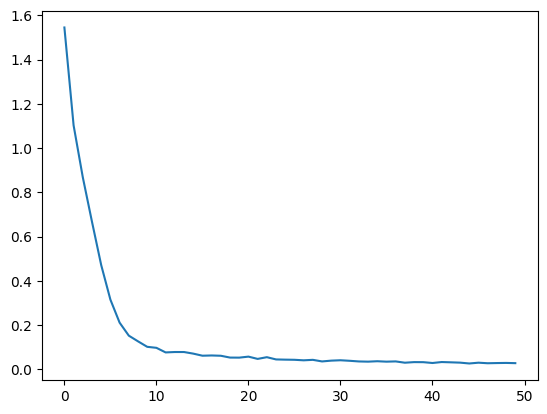

In [5]:
!nvidia-smi
import tensorflow as tf
from keras.datasets import cifar10 as dataset
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

def load_data():
  (x_train, y_train), (x_test, y_test) = dataset.load_data()
#konwersja wektorów y_train i y_test do formatu one-hot
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return x_train, y_train, x_test, y_test
def normalize_pixels(tmp_train, tmp_test):
# Zamiana na zmiennoprzecinkowe
  x_train = tmp_train.astype('float32')
  x_test = tmp_test.astype('float32')
# Normalizacja
  x_train = x_train / 255.0
  x_test = x_test / 255.0
  return x_train, x_test

x_train, y_train, x_test, y_test = load_data()
x_train, x_test = normalize_pixels(x_train, x_test)

model = keras.Sequential(
    [
        layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(1000, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ]
)

opt_adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)
opt_sgd_nesterov = tf.keras.optimizers.SGD(nesterov=True, learning_rate=0.01)
opt_adadelta = tf.keras.optimizers.Adadelta(learning_rate=1.0)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=50)

plt.plot(history.history['loss'], label='Adagrad')
plt.plot(history.history['val_loss'], label='Adagrad validation')
plt.plot(history2.history['loss'], label='RMSprop')
plt.plot(history2.history['val_loss'], label='RMSprop validation')
plt.plot(history3.history['loss'], label='SGDNesterov')
plt.plot(history3.history['val_loss'], label='SGDNesterov validation')
plt.plot(history4.history['loss'], label='AdaDelta')
plt.plot(history4.history['val_loss'], label='AdaDelta validation')
plt.plot(history5.history['loss'], label='Adam')
plt.plot(history5.history['val_loss'], label='Adam validation')